# Line Detection via Hough Transform

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from scipy import ndimage, signal, stats

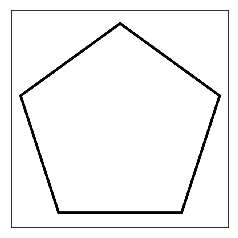

In [8]:
def color2gray(image):
    return 0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]

def plot_image(im, ax=None, title=None, gray=True):
    if not ax:
        ax = plt.subplots()[1]
    cmap = 'gray' if gray else None
    ax.imshow(im, cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    if title:
        ax.set_title(title)
        
def gradient(image):
    """Uses a Sobel filter to calculate gradient magnitude."""
    kx = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])
    ky = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])
    Lx = signal.convolve2d(image, kx, mode='valid')
    Ly = signal.convolve2d(image, ky, mode='valid')
    
    magnitude = np.sqrt(Lx**2 + Ly**2)
    angle = np.arctan2(Ly, Lx) # arctan modifies the second argument in-place
    
    return magnitude, angle, Lx, Ly

def threshold(magnitude, thresh):
    return (magnitude > thresh).astype('uint8') * 255

pentagon = color2gray(mpimg.imread("hough_images/pentagon.jpg"))
plot_image(pentagon)

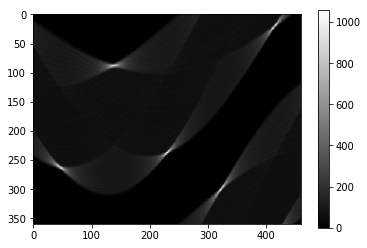

In [9]:
def hough(image, n_r_bins=20, n_t_bins=20):
    """Finds lines in the image space, corresponding to local maxima in the accumulator space."""
    m, n = image.shape
    acc = np.zeros((n_r_bins, n_t_bins)) # contains (r,θ) pairs
    
    rmax = int(np.sqrt(m**2 + n**2))
    rs, dr = np.linspace(0, rmax, n_r_bins, endpoint=True, retstep=True)
    thetas, dt = np.linspace(0, np.pi, n_t_bins, endpoint=False, retstep=True)
    
    mag, angle, Lx, Ly = gradient(image)
    
    for iy in range(m):
        for jx in range(n):
            if image[iy,jx] == 255: continue
            # or get the image gradient, and find a line parallel to that
            
            # for each theta, calculate r. accumulate that bin.
            for i_t in range(n_t_bins):
                theta = i_t * dt
                r = jx * np.cos(theta) + iy * np.sin(theta)
                i_r = int(r / dr + 0.5)
                acc[i_r, i_t] += 1
                
    return acc
                
                     
    
acc = hough(pentagon, n_r_bins=360, n_t_bins=460)
plt.imshow(acc, cmap='gray')
plt.colorbar()

In [10]:
vec, Lx, Ly = gradient_direction(pentagon)
fig, axs = plt.subplots(1, 3, figsize=(15,5))
plot_image(vec, axs[0])
plot_image(Lx, axs[1])
plot_image(Ly, axs[2])
plt.show()

NameError: name 'gradient_direction' is not defined

In [ ]:
theta = np.arctan2(Ly, Lx)
foo.min(), foo.max()

In [ ]:
peaks = ndimage.maximum_filter(acc, size=10)
plot_image(peaks)
plt.show()

maxima = (acc == peaks)
maxima.mean()